In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import weight_dict
from cProfile import label


In [2]:
#importing text file
text = []
with open('hp7.txt', "r", encoding="utf8" ) as input_f:  #if error: erase encoding="utf8"
    text = input_f.read()


In [3]:
#importing csv with all characters name
characters = pd.read_csv('characters_list.csv') #path to csv file of characters list
print(characters.head())
print(characters.shape)

   id                    name  \
0   0  Regulus Arcturus Black   
1   1            Sirius Black   
2   2          Lavender Brown   
3   3               Cho Chang   
4   4      Vincent Crabbe Sr.   

                                                 bio  
0  Brother of Sirius. Used to be a Death Eater bu...  
1  Best friend of James Potter and godfather of H...  
2  Killed by a werewolf. She was a gryffindor stu...  
3  Ravenclaw student who dated Cedric Diggory and...  
4  Father of Crabbe and death-eater who escaped A...  
(65, 3)


In [4]:
text[:1000]

'I \n\n\n\n* \n\nTHE DARK LORD ASCENDING \n\nThe two men appeared out of nowhere, a few yards \napart in the narrow, moonlit lane. For a second they \nstood quite still, wands directed at each other’s \nchests; then, recognizing each other, they stowed \ntheir wands beneath their cloaks and started walking \nbriskly in the same direction. \n\n“News?” asked the taller of the two. \n\n“The best,” replied Severus Snape. \n\nThe lane was bordered on the left by wild, low- \ngrowing brambles, on the right by a high, neatly \nmanicured hedge. The men’s long cloaks flapped \naround their ankles as they marched. \n\n“Thought I might be late,” said Yaxley, his blunt \nfeatures sliding in and out of sight as the branches of \noverhanging trees broke the moonlight. “It was a little \ntrickier than I expected. But I hope he will be \nsatisfied. You sound confident that your reception will \nbe good?” \n\nPage | 2 Harry Potter and the Deathly Hallows - J.K. Rowling \n\n\n\n\nSnape nodded, but did n

In [5]:
page = text.split("Harry Potter and the Deathly Hallows - J.K. Rowling")

In [6]:
page[0]

'I \n\n\n\n* \n\nTHE DARK LORD ASCENDING \n\nThe two men appeared out of nowhere, a few yards \napart in the narrow, moonlit lane. For a second they \nstood quite still, wands directed at each other’s \nchests; then, recognizing each other, they stowed \ntheir wands beneath their cloaks and started walking \nbriskly in the same direction. \n\n“News?” asked the taller of the two. \n\n“The best,” replied Severus Snape. \n\nThe lane was bordered on the left by wild, low- \ngrowing brambles, on the right by a high, neatly \nmanicured hedge. The men’s long cloaks flapped \naround their ankles as they marched. \n\n“Thought I might be late,” said Yaxley, his blunt \nfeatures sliding in and out of sight as the branches of \noverhanging trees broke the moonlight. “It was a little \ntrickier than I expected. But I hope he will be \nsatisfied. You sound confident that your reception will \nbe good?” \n\nPage | 2 '

In [7]:
#testing method for page 0
for personnage in (characters['name']):
    #print(personnage.split(' '))
    for n in personnage.split():
        if n in page[0]:
            print(f'{personnage} in page')

Severus Snape in page
Severus Snape in page


In [8]:
#dataframe of occurences of personnage by page
occurence_page = pd.DataFrame(0,columns=[characters['name']], index=(i for i in range(len(page))))

In [9]:
#add 1 if a specific personnage is in a specific page
for i in range(len(page)):
    for personnage in (characters['name']):
    #print(personnage.split(' '))
        for n in personnage.split():
            if n in page[i]:
                occurence_page.loc[[i], [personnage]] += 1
                break

In [10]:
#create the confusion matrix by dot product
occurence = occurence_page.T.dot(occurence_page)
#fill diagonal with 0
np.fill_diagonal(occurence.values, 0)

In [11]:
#drop all rows filled with zeros i.e. characters (from csv data file) having no interactions
occurence = occurence.loc[(occurence != 0).any(axis=1)]

occurence.to_csv('./occurence.csv')
occurence.head()

name,Regulus Arcturus Black,Sirius Black,Lavender Brown,Cho Chang,Vincent Crabbe Sr.,Vincent Crabbe,"Bartemius ""Barty"" Crouch Sr.","Bartemius ""Barty"" Crouch Jr.",Fleur Delacour,Cedric Diggory,...,Ginny Weasley,Molly Weasley,Percy Weasley,Ron Weasley,Dobby,Fluffy,Hedwig,Moaning Myrtle,Aragog,Grawp
name,,,,,,,,,,,,,,,,,,,,,
Regulus Arcturus Black,0,22,0,1,0,0,0,0,0,0,...,6,3,4,21,0,0,0,0,0,1
Sirius Black,22,0,0,1,0,0,0,0,3,0,...,13,10,10,33,2,0,2,0,0,1
Lavender Brown,0,0,0,0,0,0,0,0,1,0,...,1,1,1,3,0,0,0,0,0,0
Cho Chang,1,1,0,0,0,0,0,0,0,0,...,6,3,3,10,0,0,0,0,0,0
Vincent Crabbe Sr.,0,0,0,0,0,11,0,0,1,0,...,0,0,1,9,0,0,0,0,0,0


In [12]:
#Here we need to set the nodes and edges of the graph to create it

#list of all characters appearing in the text to set the nodes of the graph
nod=[]
for i in occurence.index:
    nod.append(str(i).strip("/(),'"))

#set the edges of the graph
edg=[]
for i in range(len(occurence)):
    for j in range(len(occurence)):
        if occurence.iloc[i,j] != 0:
            edg.append( (str(occurence.index[i]).strip("/(),'"),
                         str(occurence.index[j]).strip("/(),'"),
                        occurence.iloc[i,j]) )
print(edg[:3])
print(nod[:3])


[('Regulus Arcturus Black', 'Sirius Black', 22), ('Regulus Arcturus Black', 'Cho Chang', 1), ('Regulus Arcturus Black', 'Alberforth Dumbledore', 9)]
['Regulus Arcturus Black', 'Sirius Black', 'Lavender Brown']


In [13]:
plt.figure()
G=nx.DiGraph()
G.add_nodes_from(nod)
G.add_weighted_edges_from(edg)
weight=nx.get_edge_attributes(G,'weight')
threshold=90

#customed width of edges
def customed_width(most_popu, most_popu_weight):
    


#this is to set the size of the nodes according to the number of occurence of the character in the text
most_popu=occurence.sum(axis=1).sort_values(ascending=False)
harry=most_popu[0]
most_popu=(most_popu/harry)*100

#if value of most_popu < than mean of most_popu then set value to mean of most_popu
mean_most_popu=most_popu.mean() 

for i in range(len(most_popu)):
    if most_popu[i] < mean_most_popu:
        most_popu[i] = mean_most_popu

# create dictionary for the ten most popular characters
most_popu_10 = most_popu.head(10)
val = most_popu_10.values  #get values

lab_10_most_popu = []     #get name label as strings for most_popu_10 (type=pandas.Series)
for name in most_popu_10.index:
    name = str(name).strip("()',")
    lab_10_most_popu.append(name)

dict_10 = {lab_10_most_popu [i] : val[i] for i in range(len(val))}
dict_10

{'Harry Potter': 100.0,
 'Ron Weasley': 72.21951219512195,
 'Hermione Granger': 64.58536585365854,
 'Ginny Weasley': 34.536585365853654,
 'Bill Weasley': 34.0,
 'Albus Dumbledore': 33.41463414634146,
 'Fred Weasley': 33.09756097560976,
 'Lord Voldemort': 32.63414634146341,
 'Alberforth Dumbledore': 32.31707317073171,
 'George Weasley': 31.902439024390244}

<Figure size 432x288 with 0 Axes>

C:\Users\PC\AppData\Local\Temp\ipykernel_13012\1086551406.py:4: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  custom_width = [max((w/10000,w/200)[w > 30], 0.03) for w in edges_weight]


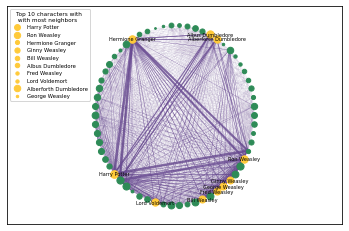

In [106]:
#create a customed width of edges
list_edges = list(G.edges())
edges_weight = np.array([G[u][v].get('weight', 1) for u, v in list_edges])
custom_width = [max((w/10000,w/200)[w > 30], 0.03) for w in edges_weight]

#get node size and store them in an array
list_nodes = list(G.nodes())
nodes_size = np.array([len(list(G.neighbors(node))) for node in list_nodes])

#let's build the graph
pos=nx.layout.circular_layout(G)

#draw the nodes proportional to the number of occurence
for count, nod in enumerate(G.nodes()):
    nod_lab = ( "", f"{nod}")
    nx.draw_networkx_nodes( 
        G, pos, nodelist=[nod], node_size=nodes_size[count],
        node_color='#FFCA3A' if nod in dict_10.keys() else 'seagreen', 
        label = nod_lab[1] if nod in dict_10.keys() else nod_lab[0]
        )

#draw the edges with the weight of the edge proportional to the number of occurence
nx.draw_networkx_edges(G, pos, edgelist=edg, width=custom_width, edge_color="#6A4C93", alpha=0.8 , arrows=False)

#set legend for 10 most popular characters
nx.draw_networkx_labels(G, pos, labels={k:k for k in dict_10.keys()}, font_size=5)
plt.legend(dict_10.keys(),loc='upper left',prop={'size': 5.3}, labelcolor='black', title='Top 10 characters with \n with most neighbors', title_fontsize="xx-small")
ax = plt.gca()
leg = ax.get_legend()
#set color of nodes in the legend
for i in range(0,10):   
    leg.legendHandles[i].set_color("#FFCA3A")
       
plt.xlim(-2.1,2.1)

plt.savefig('./network', dpi=500)
plt.show()


Commentaires:
- On arrive à qq chose de pas mal mais ce serait cool d'avoir le nombre d'occurence dans la légende
- pour l'instant j'affiche pas la légende pcq elle n'apporte rien (enlever le # pour voir)
- network pour tout le livre mais bof lisible, on testerai bien pour 1 chapitre uniquement ? 
